---

# Caso - Gigantes Rojos

Contexto del Problema
Usted ha sido contratado como parte de un equipo de científicos que busca aplicar ciencia de datos a las investigaciones sobre astronomía. Deberá, por lo tanto poner a prueba todas las habilidades y conocimientos adquiridos a lo largo de este curso. 
Su primer desafío consiste en apoyar al equipo de científicos que está estudiando a los “Gigantes Rojos” (Red Giants). Los Gigantes Rojos son estrellas gigantes de masa baja o intermedia que, tras haber consumido el hidrógeno en un núcleo, comienzan a quemar hidrógeno en una cáscara alrededor del núcleo de helio inerte, lo cual provoca un efecto de aumento de volumen de la estrella y un enfriamiento en la superficie, por lo que su color se torna rojizo.


- POP: nuestro campo objetivo  
        0: RGB Red Giant Branch
        1: HeB Helium Burning 
- Dnu: Frecuencia
- numax: Oscilación
- epsilon: salario estimado

•	Producto 1: Análisis Exploratorio de los datos, utilizando los conceptos, técnicas y herramientas vistos en clase que sean de utilidad para llevar a cabo este producto.

•	Producto 2: Modelo de aprendizaje de máquina que permita clasificar un gigante rojo de acuerdo a la clase RGB ó HeB.

•	Producto 3: Una aplicación Python de consola que permita realizar la predicción de un gigante rojo a partir de sus características, utilizando el modelo entrenado anteriormente. La idea es que el aplicativo se ejecute en la consola, permita el ingreso de los parámetros de entrada (dnu, numax, etc), y el aplicativo retorne qué clase de gigante rojo se trata.



In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [552]:
# leemos nuestro origen de datos
df_gigantesrojos=pd.read_csv("\\kibernumacademy\\asteroseismology.csv",header=0)

In [553]:
# Esta función devuelve las primeras n filas del objeto según la posición. Es útil para probar rápidamente si su objeto tiene el tipo correcto de datos.
df_gigantesrojos.head(2)

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150


### Análisis Exploratorio
##### El análisis exploratorio de datos implica el uso de gráficos y visualizaciones para explorar y analizar un conjunto de datos. El objetivo es explorar, investigar y aprender, no confirmar hipótesis estadísticas. 

In [554]:
# informa sobre los datos estadísticos de un DataFrame.
df_gigantesrojos.describe()

,POP,Dnu,numax,epsilon
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.712288,5.774810,58.441771,0.610774
std,0.452923,2.998103,43.425561,0.342518
min,0.000000,2.500080,17.979780,0.005000
25%,0.000000,4.073160,32.924350,0.220000
50%,1.000000,4.308740,38.293160,0.815000
75%,1.000000,6.580340,70.140830,0.890000
max,1.000000,17.699430,239.648480,1.000000


In [555]:
# aca podemos comprobar que las gigantes rojas
# 0: tiene una frecuencia baja
# 1: tienen una frecuencia alta
df_gigantesrojos.groupby(['POP', 'Dnu'])['Dnu'].count()

POP  Dnu     
0    2.67661     1
     3.43939     1
     3.46843     1
     3.64914     1
     4.05690     1
                ..
1    8.31658     1
     8.35683     1
     8.38482     1
     12.54107    1
     17.04898    1
Name: Dnu, Length: 998, dtype: int64

In [556]:
# aca podemos comprobar que las gigantes rojas
# 0: tiene una oscilacion baja
# 1: tienen una oscilación  alta
df_gigantesrojos.groupby(['POP', 'numax'])['numax'].count()

POP  numax    
0    21.14192     1
     30.26501     1
     30.81600     1
     31.79203     1
     37.49922     1
                 ..
1    104.12676    1
     105.45021    1
     106.35651    1
     165.92872    1
     231.37257    1
Name: numax, Length: 999, dtype: int64

In [557]:
# Devuelve valores únicos basados ​​en una tabla y un campo indicado. Lo utilizamos para encontras los valores unicos del campo 'POP'
df_gigantesrojos['POP'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:ylabel='Dnu'>

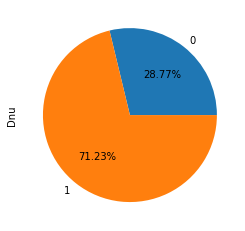

In [558]:
# proporcion por tipo de estrella
df_gigantesrojos.groupby('POP').count()['Dnu'].plot(kind='pie', autopct='%.2f%%')

<AxesSubplot:ylabel='Frequency'>

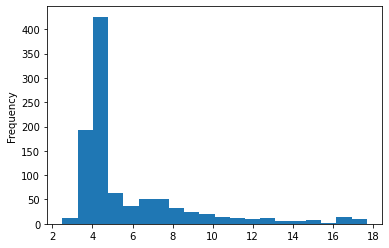

In [559]:
# Un histograma es una representación de la distribución de datos. Esta función agrupa los valores de todas las Series ('Dnu') 
# dadas en el DataFrame en contenedores y dibuja todos los contenedores en uno
df_gigantesrojos['Dnu'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

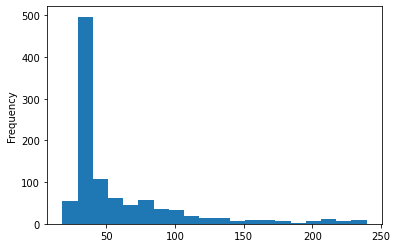

In [560]:
# Un histograma es una representación de la distribución de datos. Esta función agrupa los valores de todas las Series ('numax') 
# dadas en el DataFrame en contenedores y dibuja todos los contenedores en uno
df_gigantesrojos['numax'].plot(kind='hist', bins=20)

### Formulación del Modelo

In [561]:
# Modelo utliza los campos 'Dbu' y 'numax' para evaluar el campo 'POP' 
X = df_gigantesrojos[['Dnu','numax']]
y =df_gigantesrojos['POP']

### Escalamiento

In [562]:
# Estandarice las características eliminando la media y escalando a la varianza de la unidad. 
from sklearn.preprocessing import StandardScaler

In [563]:
# utilizaremos el escalador estandar (estandarización)
# Convertimos los valores inciales a valores mas pequeños los cuales se puedan representar y comparar.
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [564]:
# asignamos las transformaciones a la variavle 'X_sc'
X_sc = scaler.transform(X)

In [565]:
# revizamos el resultado de los datos escalados
X_sc[:10]

array([[-0.44283765, -0.35432054],
       [ 0.39016827,  0.36021422],
       [-1.04421481, -0.84929905],
       [-0.51162215, -0.60616448],
       [ 1.55922445,  1.42687271],
       [-0.48725458, -0.4803402 ],
       [-0.43635031, -0.27015615],
       [ 0.62148001,  0.66823496],
       [-0.56663774, -0.54505379],
       [-0.53931015, -0.62068461]])

### Validación Cruzada

In [566]:
from sklearn.model_selection import train_test_split

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.20, random_state=50)

### Entrenamiento KNN


In [568]:
# Es un tipo de clasificación donde la función solo se aproxima localmente y todos los cálculos se difieren hasta la evaluación de la
#  función. Dado que este algoritmo se basa en la distancia para la clasificación, si las características representan diferentes 
# unidades físicas o vienen en escalas muy diferentes, la normalización de los datos de entrenamiento puede mejorar drásticamente su precisión.
from sklearn.neighbors import KNeighborsClassifier

In [569]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Realizando predicciones

In [570]:
# un joven de 18 años sin ingresos
v1 = [[4.44780, 43.06289]]

# un adulto con buen sueldo
v2 = [[6.94399, 74.07646]]

# un adulto mayor con pension
v3 = [[5, 50]]


In [571]:
knn.predict(scaler.transform(v1))

C:\Users\56954\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [572]:
knn.predict(scaler.transform(v2))

C:\Users\56954\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [573]:
knn.predict(scaler.transform(v3))

C:\Users\56954\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### Evaluación del Modelo

In [574]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [575]:
# realizando predicciones en el set de test
y_pred = knn.predict(X_test)

In [576]:
# Este concepto se reifiera la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud (Distancias).
accuracy_score(y_test,y_pred)

0.9601990049751243

In [577]:
confusion_matrix(y_test, y_pred)

array([[ 47,   5],
       [  3, 146]], dtype=int64)

In [578]:
# de acuerdo a la matriz de confusión.
# 47 es la cantidad de positivos que fueron clasificados correctamente como positivo por el modelo
# 146 es la cantidad de negativos que fuerron clasificados correctamente como negativo por el modelo
# 5 es la cantidad de positivos que fueron clasificados incorectamente como negativo
# 3 es la cantidad de negativos que fueron clasificados incorrectamente comom positivo

### Serialización del Modelo Entrenado

In [579]:
# Joblib es un conjunto de herramientas para proporcionar una canalización ligera en Python
import joblib

In [580]:
# serializamos modelo entrenado
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [581]:
# serializamos escalador con parametros ajustados
joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']

---